In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
lending_club_data = pd.read_csv('loan.csv', low_memory= False)

In [20]:
lending_club_data.iloc[:,:100].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 100 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              39717 non-null  int64  
 1   member_id                       39717 non-null  int64  
 2   loan_amnt                       39717 non-null  int64  
 3   funded_amnt                     39717 non-null  int64  
 4   funded_amnt_inv                 39717 non-null  float64
 5   term                            39717 non-null  object 
 6   int_rate                        39717 non-null  object 
 7   installment                     39717 non-null  float64
 8   grade                           39717 non-null  object 
 9   sub_grade                       39717 non-null  object 
 10  emp_title                       37258 non-null  object 
 11  emp_length                      38642 non-null  object 
 12  home_ownership                 

### Data Preprocessing
1. All the columns having more than 90% of the null values are dropped because the data won't be sufficient for analysis.
2. All the columns having only one unique value will be dropped because they will have same values for all the three categories of loan status.
3. All the rows haiving loan status as Çurrent are dropped as we can't make any conclusions on those records.

In [21]:
#Extracting Null value columns and constant columns
null_columns = [col for col in lending_club_data.columns if lending_club_data[col].isnull().mean() * 100 >= 80]
constant_columns = [col for col in lending_club_data.columns if lending_club_data[col].nunique() == 1]

In [22]:
#Dropping the columns with null values constant value 
#Dropping the rows having current as a loan status as we will be comparing the fully paid and charged off customers.
lending_club_data = lending_club_data.drop(columns= null_columns + constant_columns)
lending_club_data = lending_club_data[lending_club_data['loan_status'] != 'Current']

In [23]:
lending_club_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0


In [24]:
# Converting numerical types from object to float
lending_club_data['int_rate'] = lending_club_data['int_rate'].str.strip('%').astype('float64')
lending_club_data['revol_util'] = lending_club_data['revol_util'].str.strip('%').astype('float64')

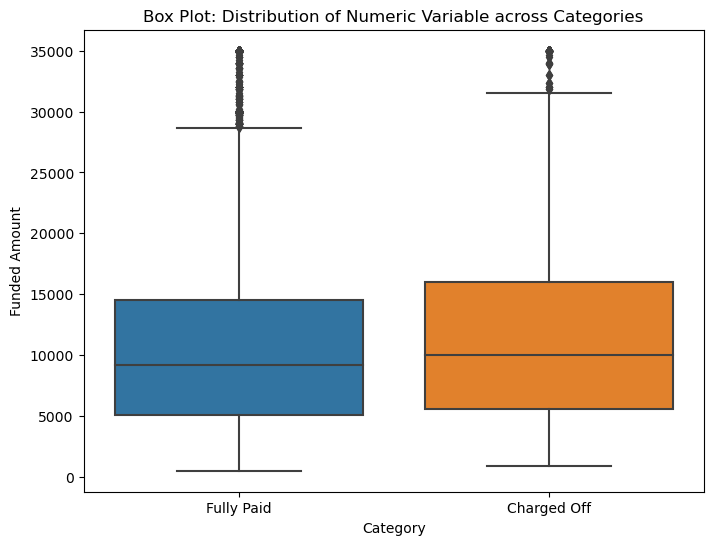

In [25]:
#Analysis between funded amount and loan status shows 
#If the funded amount is higher the Customer has higher tendency to be charged Off

plt.figure(figsize=(8, 6))
sns.boxplot(x='loan_status', y='funded_amnt', data=lending_club_data)

# Set labels and title
plt.xlabel('Category')
plt.ylabel('Funded Amount')
plt.title('Box Plot: Funded amount vs loan status')

# Show the plot
plt.show()

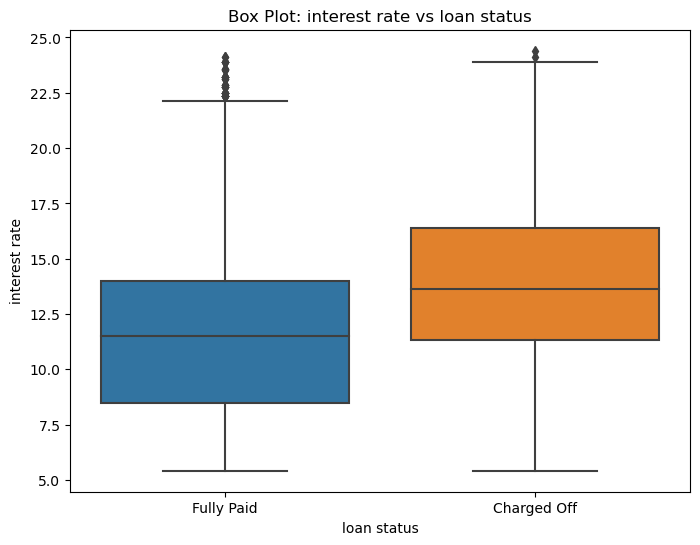

In [52]:
#Analysis between interest rate and loan status shows 
#If the interest is higher the Customer has higher tendency to be charged Off

plt.figure(figsize=(8, 6))
sns.boxplot(x='loan_status', y='int_rate', data=lending_club_data)

# Set labels and title
plt.xlabel('loan status')
plt.ylabel('interest rate')
plt.title('Box Plot: interest rate vs loan status')

# Show the plot
plt.show()

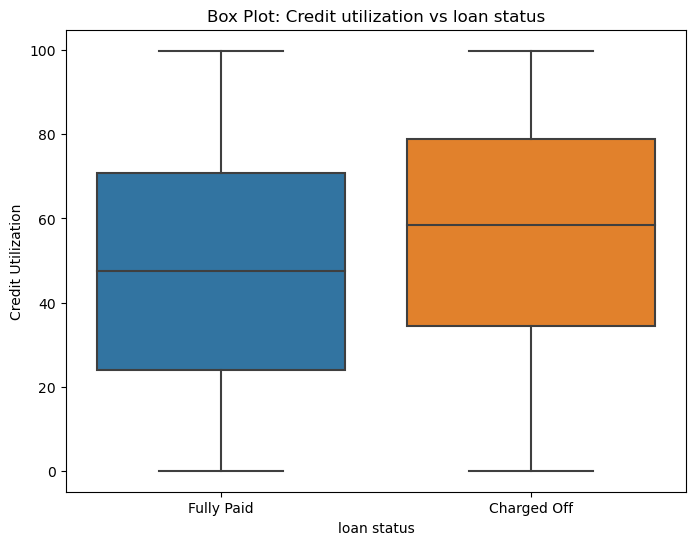

In [53]:
#Analysis between Revolving line utilization rate and loan status shows 
#If the Revolving line utilization rate is higher the Customer has higher tendency to be charged Off

plt.figure(figsize=(8, 6))
sns.boxplot(x='loan_status', y='revol_util', data=lending_club_data)

# Set labels and title
plt.xlabel('loan status')
plt.ylabel('Credit Utilization')
plt.title('Box Plot: Credit utilization vs loan status')

# Show the plot
plt.show()

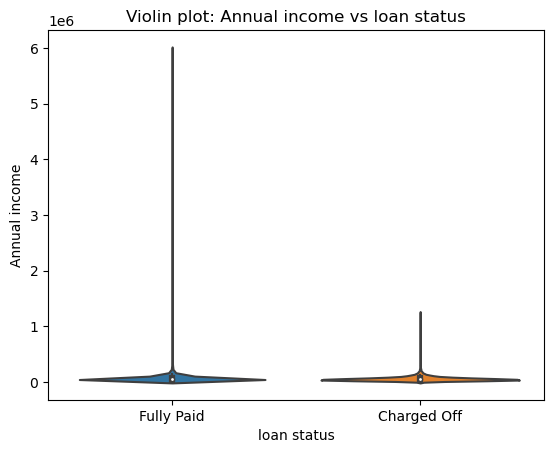

In [51]:
#Analysis between Annual Income and loan status shows 
#If the Annual Income is lower the Customer has higher tendency to be charged Off

sns.violinplot(x="loan_status", y="annual_inc", data=lending_club_data)
plt.xlabel("loan status")
plt.ylabel("Annual income")
plt.title("Violin plot: Annual income vs loan status")
plt.show()


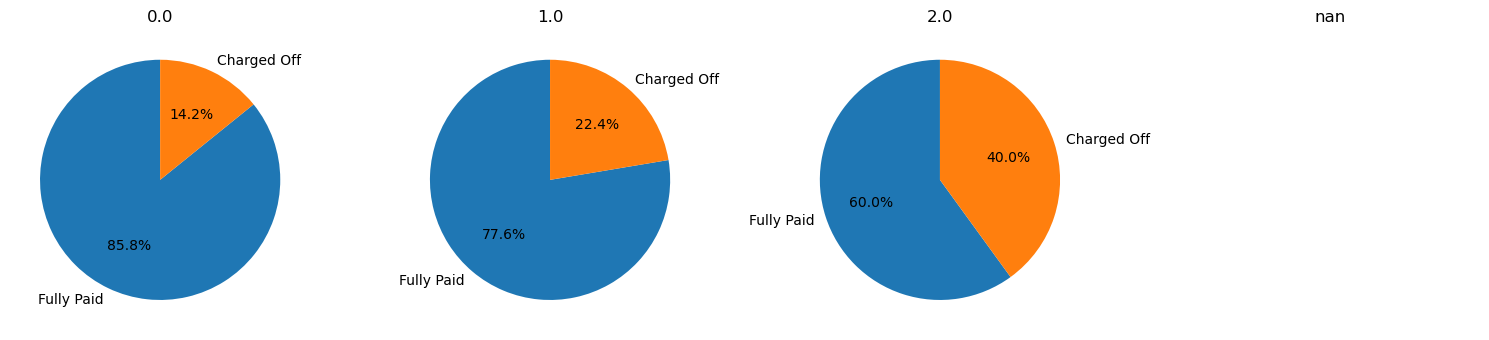

In [29]:
#Higher number of public bankruptcies shows higher charged Off percentage

# Create separate pie charts for each category in 'day' column
categories = lending_club_data['pub_rec_bankruptcies'].unique()
fig, axes = plt.subplots(1, len(categories), figsize=(15, 25))

for i, category in enumerate(categories):
    subset = lending_club_data[lending_club_data['pub_rec_bankruptcies'] == category]
    counts = subset['loan_status'].value_counts()
    axes[i].pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
    axes[i].set_title(f'{category}')

plt.tight_layout()
plt.show()


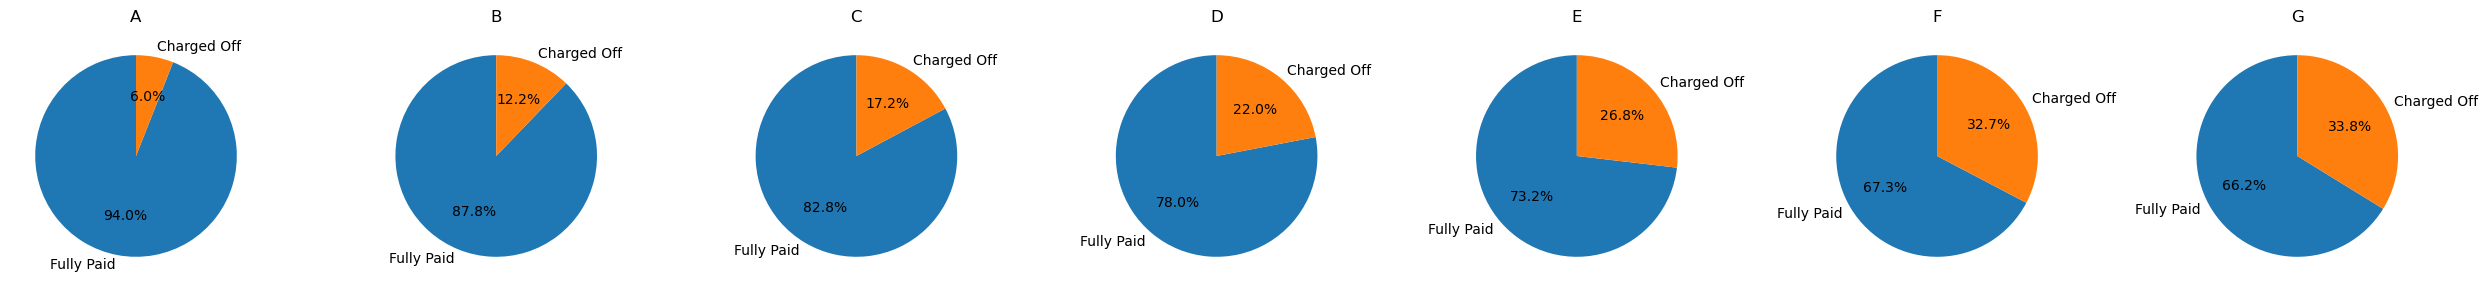

In [30]:
#As the Loan grade decreses the charged Off percentage clearly increases

sorted_df = lending_club_data.sort_values(by = 'grade')
# Create separate pie charts for each category in 'day' column
categories = sorted_df['grade'].unique()
fig, axes = plt.subplots(1, len(categories), figsize=(25, 25))

for i, category in enumerate(categories):
    subset = sorted_df[sorted_df['grade'] == category]
    counts = subset['loan_status'].value_counts()
    axes[i].pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
    axes[i].set_title(f'{category}')

plt.tight_layout()
plt.show()


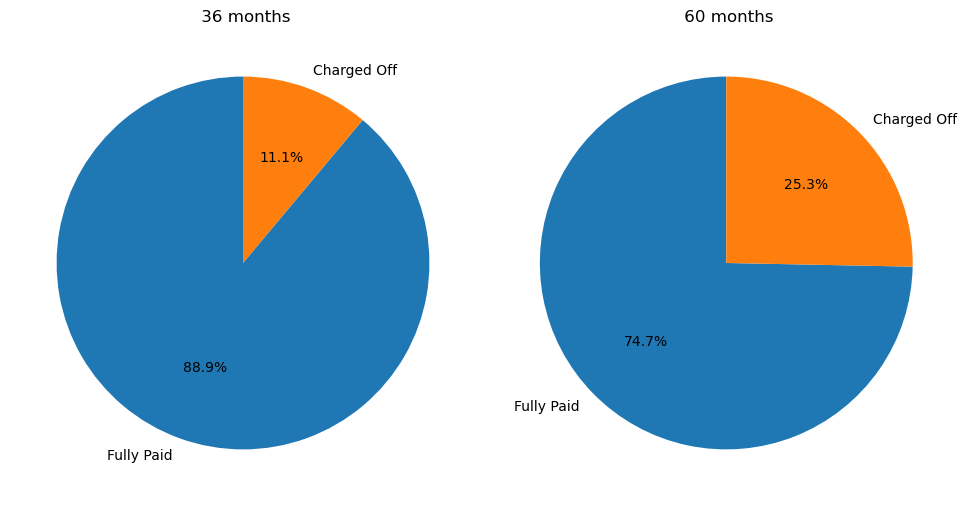

In [31]:
#For higher tenure term length the Charged Off percentage is also high

sorted_df = lending_club_data.sort_values(by = 'term')
# Create separate pie charts for each category in 'day' column
categories = sorted_df['term'].unique()
fig, axes = plt.subplots(1, len(categories), figsize=(10, 5))

for i, category in enumerate(categories):
    subset = sorted_df[sorted_df['term'] == category]
    counts = subset['loan_status'].value_counts()
    axes[i].pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
    axes[i].set_title(f'{category}')

plt.tight_layout()
plt.show()


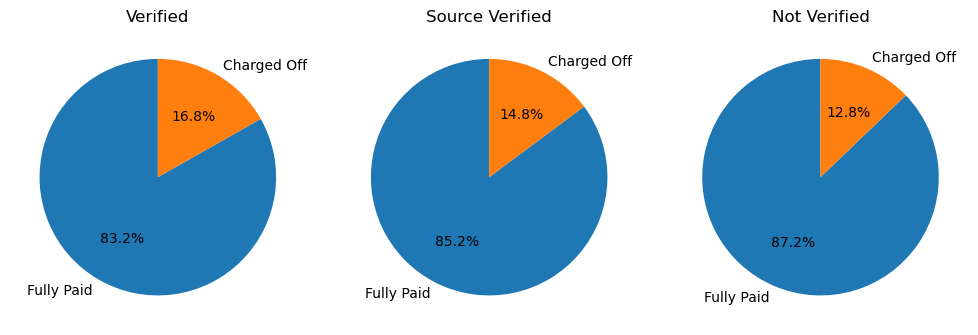

In [32]:
#For Verified Category the Charged Off percentage is comparatively higher

categories = lending_club_data['verification_status'].unique()
fig, axes = plt.subplots(1, len(categories), figsize=(10, 5))

for i, category in enumerate(categories):
    subset = lending_club_data[lending_club_data['verification_status'] == category]
    counts = subset['loan_status'].value_counts()
    axes[i].pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
    axes[i].set_title(f'{category}')

plt.tight_layout()
plt.show()


In [33]:
#Separating charged off and fully paid categories to calculate category wise percentag of purpose column
charged_off = lending_club_data[lending_club_data['loan_status'] == 'Charged Off']
fully_paid = lending_club_data[lending_club_data['loan_status'] == 'Fully Paid']


charged_off_purpose = charged_off.groupby(['purpose']).size().reset_index(name='Count')
fully_paid_purpose = fully_paid.groupby(['purpose']).size().reset_index(name='Count')

charged_off_purpose['percentage'] = charged_off_purpose['Count']/fully_paid_purpose['Count'] 

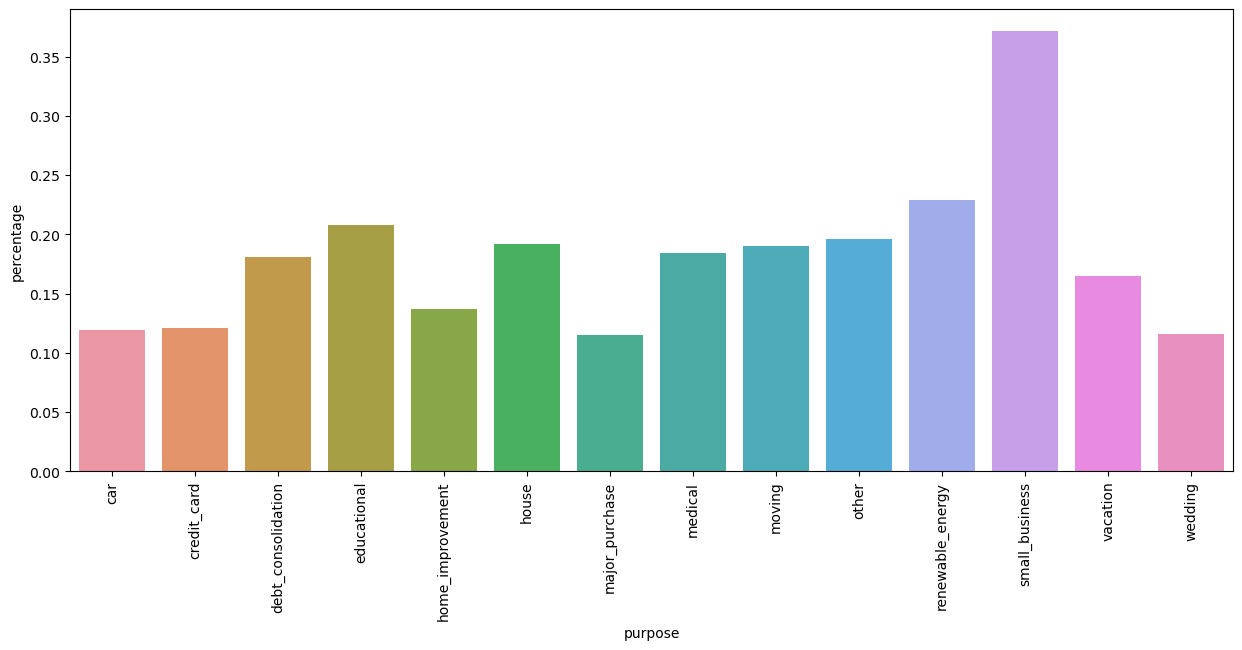

In [47]:
#Clearly small businesses have a very high tendency to be charged Off.
plt.figure(figsize=(15, 6))
sns.barplot(x='purpose', y='percentage',data = charged_off_purpose)
plt.xticks(rotation=90)
plt.show()